In [36]:
using Plots 
using LinearAlgebra 
using LaTeXStrings 
using ITensors 
using ITensorMPS 
ITensors.disable_warn_order()

In [37]:
R = 10
N = 6
;

In [ ]:
γ = 1.00

function f(vars...)
    sin(sum(vars))
end

ranges = [range(-3, 5, length=N) for _ in 1:R]

# 10変数のデータ作成（全組合せを格納）
fdata = [f(vars...) for vars in Iterators.product(ranges...)]

# プロット用データ（xだけ変化、他を0で固定）
fixed_vars = zeros(9)  # x以外の変数を0に固定
X = ranges[1]

fdata_plot = [f(x, fixed_vars...) for x in X]

6-element Vector{Float64}:
 -0.1411200080598672
 -0.9854497299884601
  0.19866933079506122
  0.9738476308781951
 -0.2555411020268312
 -0.9589242746631385

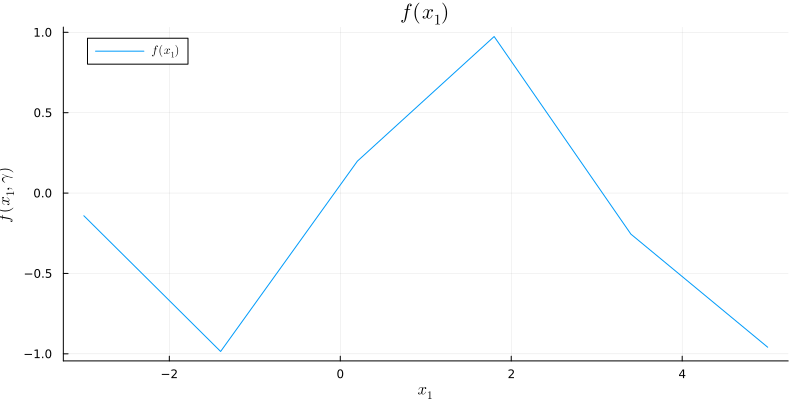

In [39]:
using Plots, LaTeXStrings

γ = 1.00

# 10変数対応関数
function f(vars...)
    sin(sum(vars))
end

ranges = [range(-3, 5, length=N) for _ in 1:R]
X = ranges[1]  # x₁ を変化させる

# x₂～x₁₀を0に固定
fixed_vars = zeros(9)

# f(x₁, 0, ..., 0) の値を計算
fdata_plot = [f((x, fixed_vars...)...) for x in X]

# プロット
plot(X, fdata_plot,
    label = L"f(x_1)",
    xlabel = L"x_1",
    ylabel = L"f(x_1, \gamma)",
    title = L"f(x_1)",
    legend = :topleft,
    size = (800, 400))

#### スケール分解

In [40]:
sitesx = [Index(N, "Qubit,x=$i") for i in 1:R]
Tensor = ITensor(fdata, vcat(reverse(sitesx)))
;

In [41]:
#足の並べ方をランダムに配置してMPSを構成
using Random
cutoff = 1e-10
sitesx_ = [Index(N, "Qubit,x=$i") for i in 1:R]
shuffle!(sitesx_)
@show sitesx_
Tensor_ = ITensor(fdata, vcat(reverse(sitesx_)))
;

M = MPS(Tensor_, vcat(sitesx_))
M1 = MPS(Tensor_, vcat(sitesx_); cutoff=cutoff)
;
@show M1

sitesx_ = Index{Int64}[(dim=6|id=834|"Qubit,x=6"), (dim=6|id=56|"Qubit,x=7"), (dim=6|id=415|"Qubit,x=3"), (dim=6|id=981|"Qubit,x=5"), (dim=6|id=470|"Qubit,x=2"), (dim=6|id=764|"Qubit,x=10"), (dim=6|id=331|"Qubit,x=9"), (dim=6|id=443|"Qubit,x=8"), (dim=6|id=808|"Qubit,x=1"), (dim=6|id=340|"Qubit,x=4")]
M1 = MPS
[1] ((dim=6|id=834|"Qubit,x=6"), (dim=2|id=639|"Link,l=1"))
[2] ((dim=2|id=639|"Link,l=1"), (dim=6|id=56|"Qubit,x=7"), (dim=2|id=997|"Link,l=2"))
[3] ((dim=2|id=997|"Link,l=2"), (dim=6|id=415|"Qubit,x=3"), (dim=2|id=25|"Link,l=3"))
[4] ((dim=2|id=25|"Link,l=3"), (dim=6|id=981|"Qubit,x=5"), (dim=2|id=12|"Link,l=4"))
[5] ((dim=2|id=12|"Link,l=4"), (dim=6|id=470|"Qubit,x=2"), (dim=2|id=846|"Link,l=5"))
[6] ((dim=2|id=846|"Link,l=5"), (dim=6|id=764|"Qubit,x=10"), (dim=2|id=201|"Link,l=6"))
[7] ((dim=2|id=201|"Link,l=6"), (dim=6|id=331|"Qubit,x=9"), (dim=2|id=879|"Link,l=7"))
[8] ((dim=2|id=879|"Link,l=7"), (dim=6|id=443|"Qubit,x=8"), (dim=2|id=842|"Link,l=8"))
[9] ((dim=2|id=842|"Lin

MPS
[1] ((dim=6|id=834|"Qubit,x=6"), (dim=2|id=639|"Link,l=1"))
[2] ((dim=2|id=639|"Link,l=1"), (dim=6|id=56|"Qubit,x=7"), (dim=2|id=997|"Link,l=2"))
[3] ((dim=2|id=997|"Link,l=2"), (dim=6|id=415|"Qubit,x=3"), (dim=2|id=25|"Link,l=3"))
[4] ((dim=2|id=25|"Link,l=3"), (dim=6|id=981|"Qubit,x=5"), (dim=2|id=12|"Link,l=4"))
[5] ((dim=2|id=12|"Link,l=4"), (dim=6|id=470|"Qubit,x=2"), (dim=2|id=846|"Link,l=5"))
[6] ((dim=2|id=846|"Link,l=5"), (dim=6|id=764|"Qubit,x=10"), (dim=2|id=201|"Link,l=6"))
[7] ((dim=2|id=201|"Link,l=6"), (dim=6|id=331|"Qubit,x=9"), (dim=2|id=879|"Link,l=7"))
[8] ((dim=2|id=879|"Link,l=7"), (dim=6|id=443|"Qubit,x=8"), (dim=2|id=842|"Link,l=8"))
[9] ((dim=2|id=842|"Link,l=8"), (dim=6|id=808|"Qubit,x=1"), (dim=2|id=467|"Link,l=9"))
[10] ((dim=2|id=467|"Link,l=9"), (dim=6|id=340|"Qubit,x=4"))


In [42]:
#スケール分離してMPSを構成
sites = Index{Int64}[]
for i in 1:R
    push!(sites, sitesx[i])
end

M2 = MPS(Tensor, sites; cutoff=cutoff)
;

In [43]:
@show M2

M2 = MPS
[1] ((dim=6|id=896|"Qubit,x=1"), (dim=2|id=501|"Link,l=1"))
[2] ((dim=2|id=501|"Link,l=1"), (dim=6|id=531|"Qubit,x=2"), (dim=2|id=640|"Link,l=2"))
[3] ((dim=2|id=640|"Link,l=2"), (dim=6|id=489|"Qubit,x=3"), (dim=2|id=351|"Link,l=3"))
[4] ((dim=2|id=351|"Link,l=3"), (dim=6|id=888|"Qubit,x=4"), (dim=2|id=818|"Link,l=4"))
[5] ((dim=2|id=818|"Link,l=4"), (dim=6|id=669|"Qubit,x=5"), (dim=2|id=325|"Link,l=5"))
[6] ((dim=2|id=325|"Link,l=5"), (dim=6|id=284|"Qubit,x=6"), (dim=2|id=618|"Link,l=6"))
[7] ((dim=2|id=618|"Link,l=6"), (dim=6|id=601|"Qubit,x=7"), (dim=2|id=666|"Link,l=7"))
[8] ((dim=2|id=666|"Link,l=7"), (dim=6|id=211|"Qubit,x=8"), (dim=2|id=134|"Link,l=8"))
[9] ((dim=2|id=134|"Link,l=8"), (dim=6|id=416|"Qubit,x=9"), (dim=2|id=659|"Link,l=9"))
[10] ((dim=2|id=659|"Link,l=9"), (dim=6|id=53|"Qubit,x=10"))



MPS
[1] ((dim=6|id=896|"Qubit,x=1"), (dim=2|id=501|"Link,l=1"))
[2] ((dim=2|id=501|"Link,l=1"), (dim=6|id=531|"Qubit,x=2"), (dim=2|id=640|"Link,l=2"))
[3] ((dim=2|id=640|"Link,l=2"), (dim=6|id=489|"Qubit,x=3"), (dim=2|id=351|"Link,l=3"))
[4] ((dim=2|id=351|"Link,l=3"), (dim=6|id=888|"Qubit,x=4"), (dim=2|id=818|"Link,l=4"))
[5] ((dim=2|id=818|"Link,l=4"), (dim=6|id=669|"Qubit,x=5"), (dim=2|id=325|"Link,l=5"))
[6] ((dim=2|id=325|"Link,l=5"), (dim=6|id=284|"Qubit,x=6"), (dim=2|id=618|"Link,l=6"))
[7] ((dim=2|id=618|"Link,l=6"), (dim=6|id=601|"Qubit,x=7"), (dim=2|id=666|"Link,l=7"))
[8] ((dim=2|id=666|"Link,l=7"), (dim=6|id=211|"Qubit,x=8"), (dim=2|id=134|"Link,l=8"))
[9] ((dim=2|id=134|"Link,l=8"), (dim=6|id=416|"Qubit,x=9"), (dim=2|id=659|"Link,l=9"))
[10] ((dim=2|id=659|"Link,l=9"), (dim=6|id=53|"Qubit,x=10"))


BondDim = Plot{Plots.GRBackend() n=3}


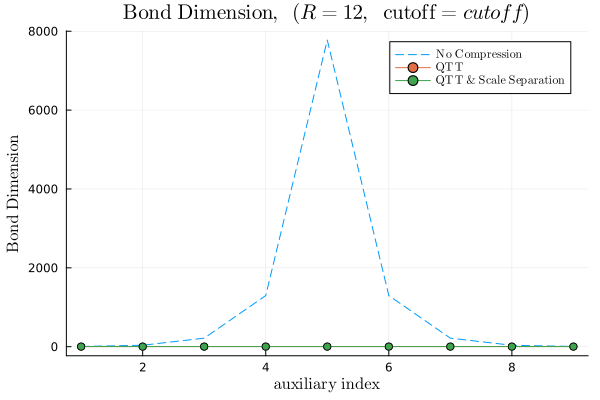

In [44]:
#ボンド次元をプロットする

BondDim = plot(#yscale = :log,
                title = L"\mathrm{Bond~Dimension},~~ (R = 12, ~~\mathrm{cutoff}={cutoff})",
                xlabel = L"\mathrm{auxiliary~index}",
                ylabel = L"\mathrm{Bond~Dimension}")

plot!(BondDim, linkdims(M),
        linestyle = :dash,
        label = L"\mathrm{No~Compression}")

plot!(BondDim, linkdims(M1),
        markershape = :circle,
        label = L"\mathrm{QTT}")

plot!(BondDim, linkdims(M2),
        markershape = :circle,
        label = L"\mathrm{QTT~&~Scale~Separation}")
savefig("BondDim_spectol.pdf")
@show BondDim

In [45]:
savefig("BondDim_spectol.png")

"/Users/sakurairihito/Documents/Research/post-doc/Tensor_FixedSeedMC/notebook/multi-asset/Europian_min_op/random_corr/all_gr100/BondDim_spectol.png"

In [46]:
M2_reconst = Array(reduce(*, M2), vcat(reverse(sitesx)));

In [47]:
M2_reconst = reshape(M2_reconst, N^R);
M2_original = reshape(fdata, N^R)

60466176-element Vector{Float64}:
  0.9880316240928618
  0.12533562609642912
 -0.9953511049115591
 -0.06720807252547492
  0.9992759921366277
  0.008851309290403876
  0.12533562609642912
 -0.9953511049115591
 -0.06720807252547492
  0.9992759921366277
  ⋮
  0.9383074733335544
  0.3182565111024882
 -0.9568933495204878
 -0.9165215479156338
 -0.3730527710886221
  0.9383074733335544
  0.3182565111024882
 -0.9568933495204878
 -0.26237485370392877

In [48]:
M2_reconst #

60466176-element Vector{Float64}:
  0.9880316240928291
  0.12533562609636506
 -0.9953511049115225
 -0.06720807252541242
  0.9992759921365875
  0.008851309290343145
  0.125335626096365
 -0.9953511049115221
 -0.0672080725254122
  0.999275992136587
  ⋮
  0.9383074733335888
  0.31825651110243264
 -0.9568933495205204
 -0.9165215479156726
 -0.3730527710885731
  0.9383074733335891
  0.31825651110243314
 -0.956893349520521
 -0.26237485370387464

In [49]:
abs.( M2_reconst .- M2_original) |> maximum |> println

7.971401316808624e-14
